[   0    1    2 ..., 5850 5851 5852]


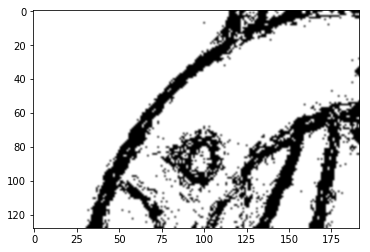

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62]


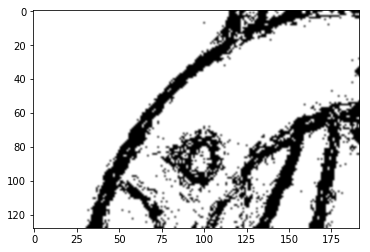

[[ 6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
   6  6  6  6  6  6  6  6  6  6  6]
 [ 6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
   6  6  6  6  6  6  6  6  6  6  6]
 [ 6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
   6  6  6  6  6  6  6  6  6  6  6]
 [ 6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
   6  6  6  6  6  6  6  6  6  6  6]
 [ 6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
   6  6  6  6  6  6  6  6  6  6  6]
 [ 6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
   6  6  6  6  6  6  6  6  6  6  6]
 [ 6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
   6  6  6  6  6  6  6  6  6  6  6]
 [ 6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
   6  0  6  6  6  6  6  6  6  6  6]
 [ 6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
   6  6  6  6  6  6  6  6  6  6  6]
 [ 6  6  6

In [158]:
# import the necessary packages
from imutils import contours
from skimage import measure
import numpy as np
from matplotlib import pyplot as plt
import argparse
import imutils
import cv2

thresh=cv2.imread('data/inpainting/9_edge.png',0)
thresh = thresh[0:128, 0:192]

im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#thresh=cv2.rgb2gray(image)
#print(thresh[20,25])
for i in range(1,3):
    if (i%2==0):
        back=0
    else :
        back=255
    labels = measure.label(thresh, neighbors=8, background=back,return_num=False, connectivity=0)
    #print(labels[60:90,125])
    mask = np.zeros(thresh.shape, dtype="uint8")
    plt.imshow(thresh, cmap = 'gray', interpolation = 'bicubic')


    for label in np.unique(labels):
        # if this is the background label, ignore it
        if label ==0:
            continue
            # otherwise, construct the label mask and count the
            # number of pixels 
        labelMask = np.zeros(thresh.shape, dtype="uint8")
        labelMask[labels == label] = 255
        numPixels = cv2.countNonZero(labelMask)

        # if the number of pixels in the component is sufficiently
        # large, then add it to our mask of "large blobs"
        if numPixels> 1:
            mask = cv2.add(mask, labelMask)
    print(np.unique(labels))
    plt.imshow(mask, cmap = 'gray', interpolation = 'bicubic')
    #plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()
    thresh[:,:]=mask[:,:]
#labels1 = measure.label(mask, neighbors=8, background=0)
#print(np.unique(labels1))
print(labels[40:60,150:185])
#print(np.argwhere(labels1==45))
#labels1 = measure.label(mask, neighbors=8, background=0)

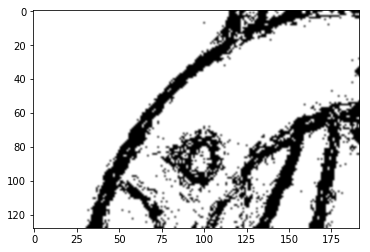

In [150]:
im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(thresh, contours, 3, (0,255,0), 3)
plt.imshow(mask, cmap = 'gray', interpolation = 'bicubic')

plt.show()